In [558]:
#Reading the Datafile
import pandas as pd
import numpy as np
#Reading the Datafile
import pandas as pd
import numpy as np
mydata = pd.read_csv('/Users/dannie/Documents/STA141B/finalproject/airbnb_price.csv')
mydata[0:10]

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0
5,12422935,4.442651,Apartment,Private room,"{TV,""Wireless Internet"",Heating,""Smoke detecto...",2,1.0,Real Bed,strict,True,...,37.753164,-122.429526,Comfort Suite San Francisco,Noe Valley,3,100.0,https://a0.muscache.com/im/pictures/82509143-4...,94131,1.0,1.0
6,11825529,4.418841,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",3,1.0,Real Bed,moderate,True,...,33.980454,-118.462821,Beach Town Studio and Parking!!!11h,NaN,15,97.0,https://a0.muscache.com/im/pictures/4c920c60-4...,90292,1.0,1.0
7,13971273,4.787492,Condominium,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Wheelchair...",2,1.0,Real Bed,moderate,True,...,34.046737,-118.260439,"Near LA Live, Staple's. Starbucks inside. OWN ...",Downtown,9,93.0,https://a0.muscache.com/im/pictures/61bd05d5-c...,90015,1.0,1.0
8,180792,4.787492,House,Private room,"{TV,""Cable TV"",""Wireless Internet"",""Pets live ...",2,1.0,Real Bed,moderate,True,...,37.781128,-122.501095,Cozy Garden Studio - Private Entry,Richmond District,159,99.0,https://a0.muscache.com/im/pictures/0ed6c128-7...,94121,1.0,1.0
9,5385260,3.583519,House,Private room,"{""Wireless Internet"",""Air conditioning"",Kitche...",2,1.0,Real Bed,moderate,True,...,33.992563,-117.895997,No.7 Queen Size Cozy Room 舒适大床房,NaN,2,90.0,https://a0.muscache.com/im/pictures/8d2f08ce-b...,91748,1.0,1.0


In [559]:
#Get the data dimension and the types of each column in mydata
print(mydata.shape)
mydata.dtypes

(74111, 29)


id                          int64
log_price                 float64
property_type              object
room_type                  object
amenities                  object
accommodates                int64
bathrooms                 float64
bed_type                   object
cancellation_policy        object
cleaning_fee                 bool
city                       object
description                object
first_review               object
host_has_profile_pic       object
host_identity_verified     object
host_response_rate         object
host_since                 object
instant_bookable           object
last_review                object
latitude                  float64
longitude                 float64
name                       object
neighbourhood              object
number_of_reviews           int64
review_scores_rating      float64
thumbnail_url              object
zipcode                    object
bedrooms                  float64
beds                      float64
dtype: object

In [560]:
#Show which column has missing values and how many missing values that variables have
print(mydata.isna().sum()[mydata.isna().sum() > 0])

bathrooms                   200
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
last_review               15827
neighbourhood              6872
review_scores_rating      16722
thumbnail_url              8216
zipcode                     966
bedrooms                     91
beds                        131
dtype: int64


In [561]:
#Assign the specific zipcode area into the zipcode (it contains the '-' in between)
if any(mydata.zipcode.str.contains("-")):
    mydata.zipcode = mydata.zipcode.str.partition('-')[0].str.strip()
else:
    mydata.zipcode = mydata.zipcode
#Remove unnecessary zipcode data that are mislabeled.
mydata.zipcode = mydata.loc[(mydata.zipcode.str.len() <6) & (mydata.zipcode.str.len() >4) & (mydata.zipcode != '15074'),'zipcode']
#Fix the mislabeled data that has the city from 'NYC' to 'LA' where the zip code is 10023
mydata.loc[mydata.zipcode == '10023', 'city'] = 'NYC'
mydata.loc[mydata.zipcode == '10023', 'city'].value_counts()
#Replace the data that has NaN values with 0
mydata = mydata.fillna(0)

In [562]:
#Extract the year from the host_since variable then assign it to the new variable called 'year'
mydata['host_since'] = pd.to_datetime(mydata['host_since'])
mydata['year']=mydata['host_since'].apply(lambda x: x.year)
print(mydata.year.value_counts())
#Drop the mydata that has the year of 1970 since they are mislabeled - wrong information
mydata = mydata[mydata['year'] != 1970]

2015    15594
2014    13690
2016    13190
2013    10729
2012     8308
2017     4970
2011     4887
2010     1766
2009      698
1970      188
2008       91
Name: year, dtype: int64


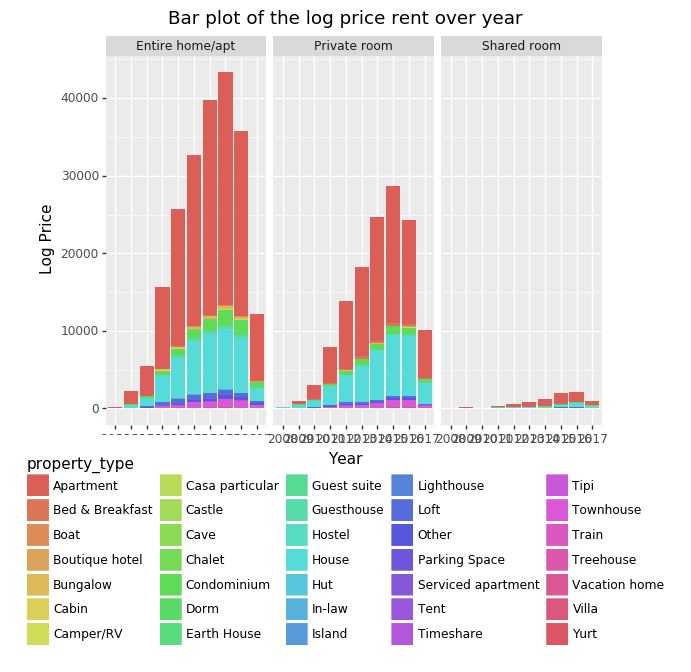

<ggplot: (7609966235)>

In [563]:
import plotnine as p9
from plotnine import*
%matplotlib inline
import matplotlib.pyplot as plt
#Remove the warnings
import warnings
warnings.filterwarnings("ignore")
#Make the bar plot that shows the log price rent over the year using ggplot and geom_bar
(p9.ggplot(mydata, aes(x='factor(year)', y='log_price', fill = 'property_type'))
 + p9.xlab("Year") + p9.ylab("Log Price") + p9.geoms.geom_bar(stat='identity') 
 + p9.ggtitle('Bar plot of the log price rent over year') + p9.facet_wrap('~room_type') + p9.theme(legend_position = 'bottom'))

This shows that the log price reaches its peaks in 2015, and the 4 property types that Airbnb rents out the most are apartments, houses, condos then townhouses where entire home/apt are rented the most, the private room and shared room correspondingly.

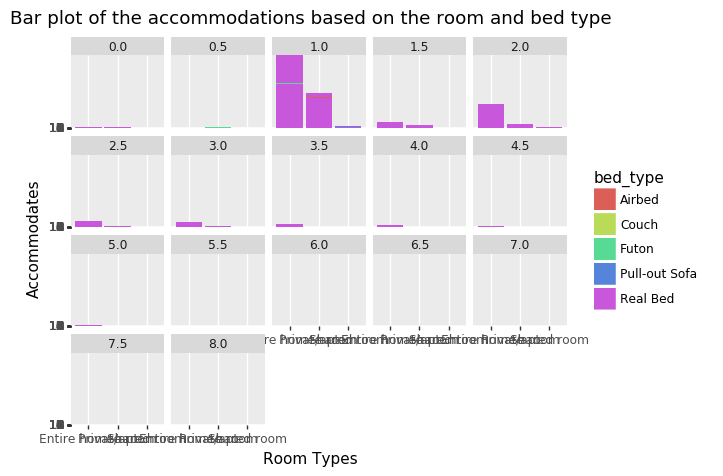

<ggplot: (-9223372029298894995)>

In [564]:
#Make the bar plot that shows accommodations based on the room and bed type using ggplot and geom_bar
(p9.ggplot(mydata, aes(x='factor(room_type)', y='factor(accommodates)', fill = 'bed_type'))
 + p9.xlab("Room Types") + p9.ylab("Accommodates") + p9.geoms.geom_bar(stat='identity') + p9.facet_wrap('~bathrooms')
+ p9.ggtitle('Bar plot of the accommodations based on the room and bed type'))

The ggplot above shows that most of the Airbnb rentals have real beds instead of airbed, couch or pull-out sofa ... and they mostly have entire home/apartment then private room with the majority of either 1 or 2 bathrooms.

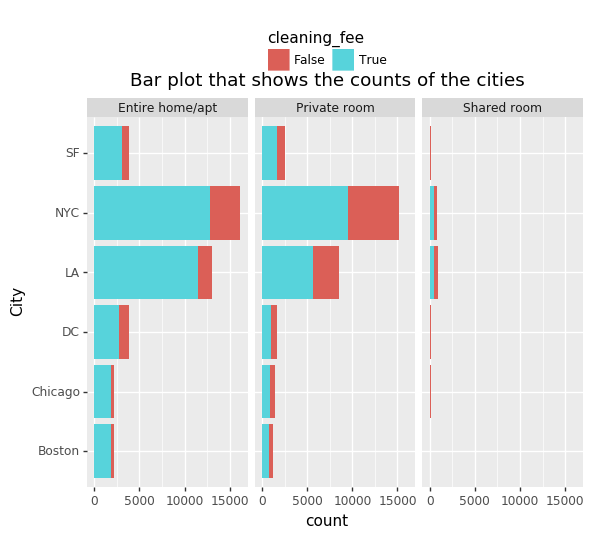

<ggplot: (-9223372029254768233)>

In [565]:
#Make the bar plot that shows the counts of cities based on the Room types using ggplot and geom_bar
(p9.ggplot(mydata, aes(x='city', fill = 'cleaning_fee')) + p9.xlab("City") + p9.geoms.geom_bar() + p9.theme(legend_position = 'top')
+ p9.facet_wrap('~room_type') + p9.ggtitle('Bar plot that shows the counts of the cities') + p9.coord_flip())

Based on the bar plot above, we can see that the top 3 cities that have Airbnb rentals are NYC, LA and SF correspondingly where mostly all of the 6 cities require the cleaning fee for the Airbnb rentals with mainly entire home/apt then private room.

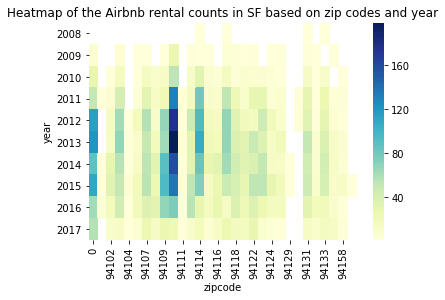

In [566]:
import seaborn as sns
mydata['text'] = 1
#Create the SF spreadsheet-style pivot table in order to create the heatmap of the rental counts in SF using seaborn package
sf_pivot = pd.pivot_table(mydata[mydata.city == 'SF'], index='year', columns='zipcode', values='text', aggfunc=np.sum)
sns.heatmap(sf_pivot, cmap="YlGnBu")
plt.title('Heatmap of the Airbnb rental counts in SF based on zip codes and year')
plt.show()

In [567]:
sf_pivot.sum().sort_values(ascending=False)[0:6]

zipcode
94110    987.0
0        642.0
94114    526.0
94109    448.0
94117    365.0
94103    361.0
dtype: float64

Based on the heatmap of the Airbnb rental counts in SF above, we can see that the top 5 zipcodes that has the most Airbnb rentals in SF are : 94110, 94114, 94109, 94117, 94103

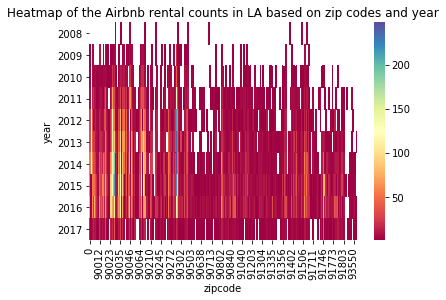

In [568]:

#Create the LA spreadsheet-style pivot table in order to create the heatmap of the rental counts in LA using seaborn package
la_pivot = pd.pivot_table(mydata[mydata.city == 'LA'], index='year', columns='zipcode', values='text', aggfunc=np.sum)
sns.heatmap(la_pivot, cmap="Spectral")
plt.title('Heatmap of the Airbnb rental counts in LA based on zip codes and year')
plt.show()

In [569]:
la_pivot.sum().sort_values(ascending=False)[0:5]

zipcode
90291    1274.0
90046     967.0
90028     782.0
90026     722.0
90036     633.0
dtype: float64

Based on the heatmap of the Airbnb rental counts in LA above, we can see that the top 5 zipcodes that has the most Airbnb rentals in LA are: 90291, 90046, 90028, 90026, 90036

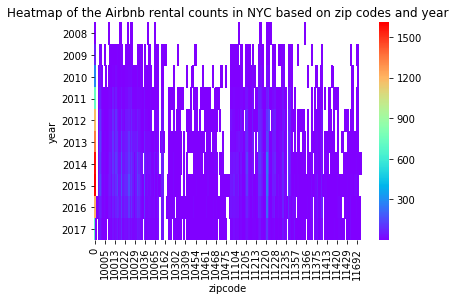

In [570]:
#Create the NYC spreadsheet-style pivot table in order to create the heatmap of the rental counts in NYC using seaborn package
nyc_pivot = pd.pivot_table(mydata[mydata.city == 'NYC'], index='year', columns='zipcode', values='text', aggfunc=np.sum)
sns.heatmap(nyc_pivot, cmap="rainbow")
plt.title('Heatmap of the Airbnb rental counts in NYC based on zip codes and year')
plt.show()

In [571]:
nyc_pivot.sum().sort_values(ascending=False)[0:6]

zipcode
0        8701.0
11221    1180.0
10019     772.0
11222     734.0
10002     724.0
10025     706.0
dtype: float64

Based on the heatmap of the Airbnb rental counts in NYC above, we can see that the top 5 zipcodes that has the most Airbnb rentals in NYC are: 11221, 10019, 11222, 10002, 10025

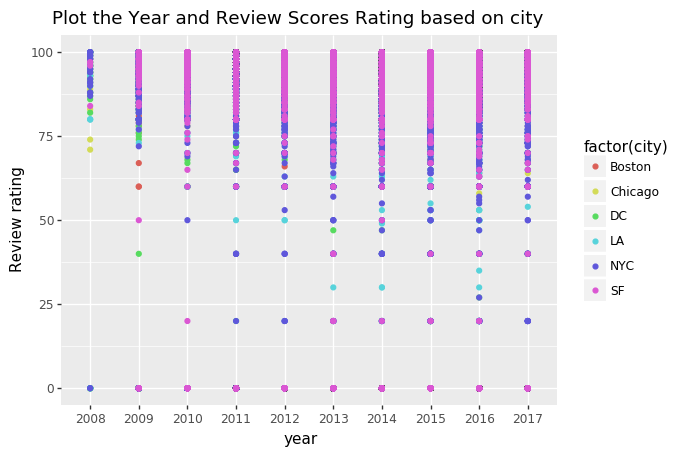

<ggplot: (-9223372029243840736)>

In [572]:
#Create the scatter plot to show the review scores rating and year based on city 
(p9.ggplot(mydata, aes(x='factor(year)', y='review_scores_rating', color = 'factor(city)'))
 + p9.geom_point() + p9.xlab("year") + p9.ylab("Review rating") +p9.ggtitle("Plot the Year and Review Scores Rating based on city "))

Based on the plot we can tell the SF had the most review score rating of Airbnb from 2010-2017 which is over 60 scores of ratings .<br /> We can tell that the Airbnb reviews of each city increased more during 2010-2017 as people started using AirBnb more and more.

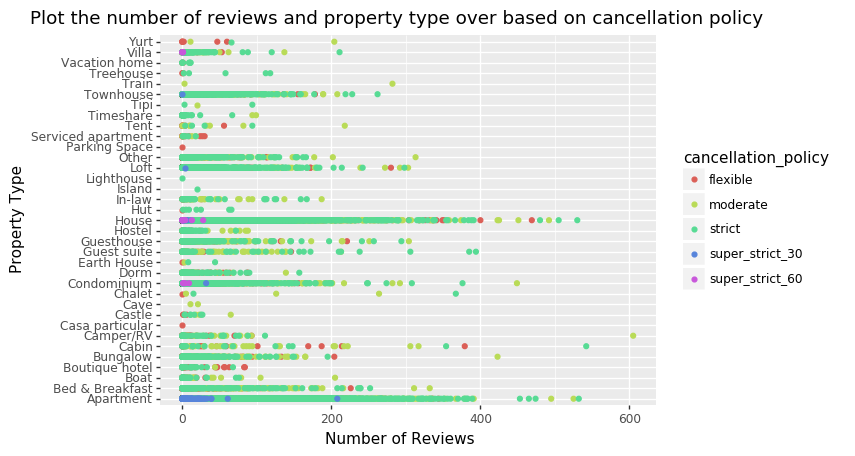

<ggplot: (7616472461)>

In [573]:
#Create the scatter plot that shows the number of reviews and property type over based on cancellation policy
(p9.ggplot(mydata,aes(x='number_of_reviews',y='factor(property_type)', color = 'cancellation_policy')) + p9.geom_point()
 +p9.ggtitle("Plot the number of reviews and property type over based on cancellation policy ") + p9.ylab("Property Type")
 +p9.xlab('Number of Reviews'))

Based on the plot , apartment and house has the most number of reviews about the Airbnb from the customers, and we can tell that most of the property type has the strict the cancelation policy. <br /> The property type parking space has the most flexible cancellation policy but has the least reviews , while property type apartment has the most reviews and also has the strict cancellation policy.

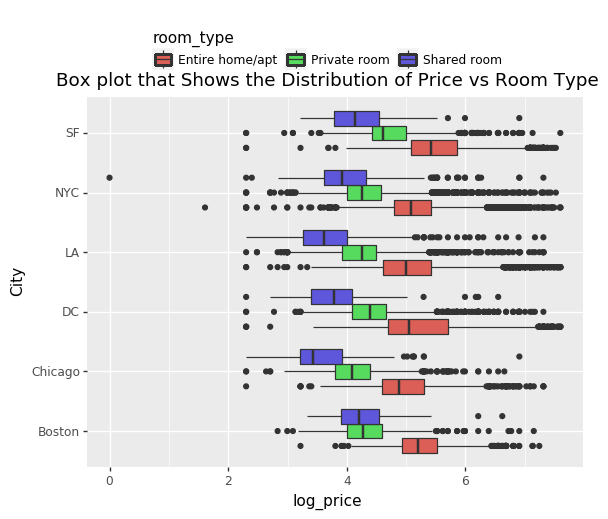

<ggplot: (7606982895)>

In [574]:
#Box plot with price vs room type
(p9.ggplot(mydata, aes(x='city', y='log_price',fill = 'room_type')) + p9.xlab("City") + p9.geoms.geom_boxplot() + p9.theme(legend_position = 'top')
 + p9.ggtitle('Box plot that Shows the Distribution of Price vs Room Type') + p9.coord_flip())

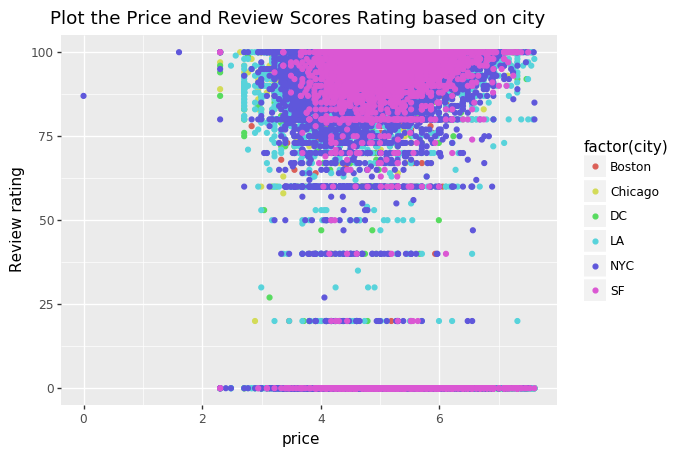

<ggplot: (7623145024)>

In [575]:
# Review Scores and Price
(p9.ggplot(mydata, aes(x='log_price', y='review_scores_rating', color = 'factor(city)'))
 + p9.geom_point() + p9.xlab("price") + p9.ylab("Review rating") +p9.ggtitle("Plot the Price and Review Scores Rating based on city "))

We can determine the most acceptable price of a listing base on the review rating score. If the listing has a higher review score, which means customers are happy with the price and quality of staying. <br /> 
From the Review scores and price plot, we can see all the score 100 listing are having a price from 1.7 to 7.6. This data gives the general idea of how price distributes in review scores. We also use boxplot with price vs room in all cities to get the more accurate numbers of the most acceptable price. Most of the house that are rented are entire home/apt.

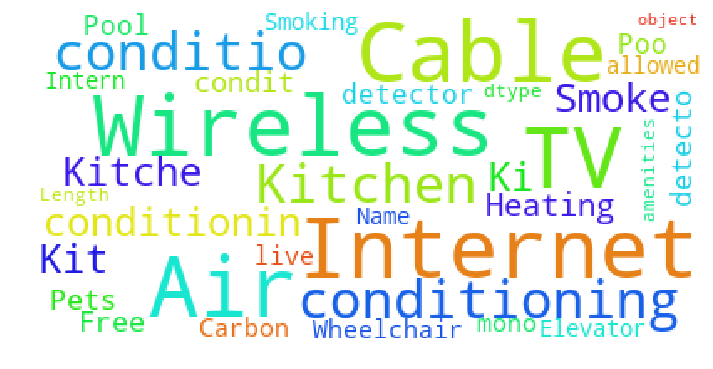

In [579]:
#Word Cloud for Amenities
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

def generate_wordcloud(data, title = None):
    """ This function helps generate the wordcloud of the dataset column then show the plot with Words
        Parameter: 
            The dataset column
    """
    wordcloud = WordCloud(background_color ='white', max_font_size=50, max_words= 200).generate(str(data))
    fig = plt.figure(1,figsize=(12,12))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
    
generate_wordcloud(mydata['amenities'])

Based on the WordCloud plot above, it shows that ‘Wireless’, ‘Internet’, and 'Cable' are the most common amenities in all the Airbnb listing posts. 

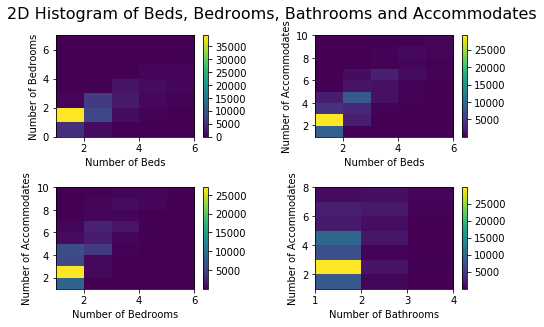

In [580]:
#2D Histogram with Beds vs Bedrooms
plt.subplot(221)
plt.hist2d(x=mydata['beds'], 
           y=mydata['bedrooms'],
           bins=(range(1,7),range(0,8)))
plt.xlabel("Number of Beds")
plt.ylabel("Number of Bedrooms")
plt.colorbar()
#2D Histogram with Beds vs Accommodates
plt.subplot(222)
plt.hist2d(y=mydata['accommodates'], 
           x=mydata['beds'],
           bins=(range(1,7),range(1,11)))
plt.xlabel("Number of Beds")
plt.ylabel("Number of Accommodates")
plt.colorbar()

#2D Histogram with Bedrooms vs Accommodates
plt.subplot(223)
plt.hist2d(y=mydata['accommodates'], 
           x=mydata['bedrooms'],
           bins=(range(1,7),range(1,11)))
plt.xlabel("Number of Bedrooms")
plt.ylabel("Number of Accommodates")
plt.colorbar()
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)
#2D Histogram with Bathrooms vs Accommodates
plt.subplot(224)
plt.hist2d(y=mydata['accommodates'], 
           x=mydata['bathrooms'],
          bins=(range(1,5),range(1,9)))
plt.xlabel("Number of Bathrooms")
plt.ylabel("Number of Accommodates")
plt.colorbar()

plt.subplots_adjust(top=.88, bottom=0, left=0, right=1, hspace=.5,
                    wspace=.5)
plt.suptitle('2D Histogram of Beds, Bedrooms, Bathrooms and Accommodates',fontsize=16)

plt.show()

From the histogram, we can also see that the yellow parts have the most search by customers. Most of the customers are looking for 1-2 rooms, 1-2 bed, 2-3 accommodates and 1-2 bathrooms.

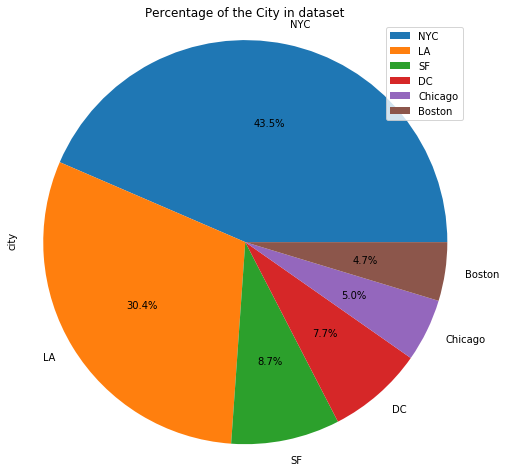

In [582]:
#Pie chart of the City
plt.figure (figsize = (8,8))
mydata.city.value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.axis('equal')
plt.legend()
plt.title('Percentage of the City in dataset')
plt.show()

This pie chart shows the percentage of cities that show up in our dataset. As we can see, NYC has the most percentage in our dataset, then LA and SF. This means having a listing in these three cities will have more competitions with other hosts. 

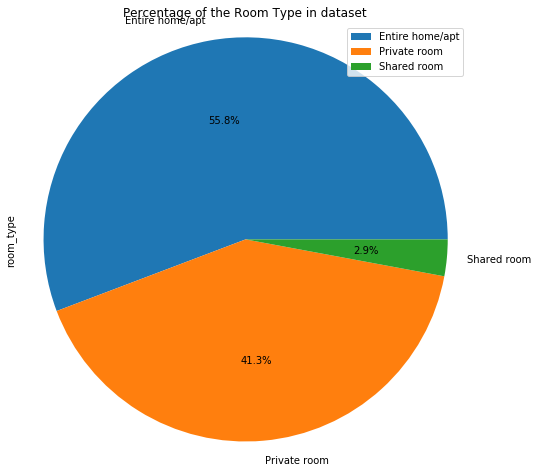

In [583]:
#Pie chart of the Room Type
plt.figure (figsize = (8,8))
mydata.room_type.value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.axis('equal')
plt.legend()
plt.title('Percentage of the Room Type in dataset',fontsize=12)
plt.show()

The pie chart above shows the 3 basic room types that people will look for when they are searching for properties with its percentage. Accordingly, entire home/apt are rented out the most.

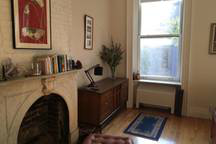

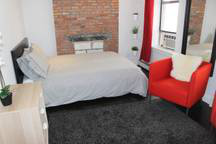

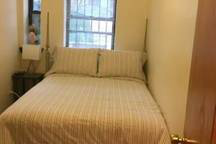

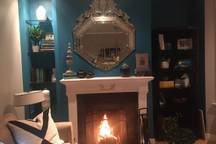

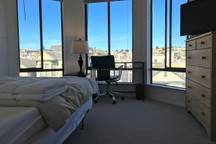

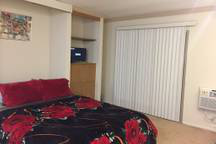

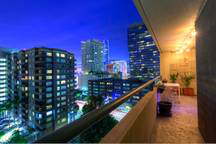

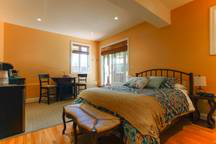

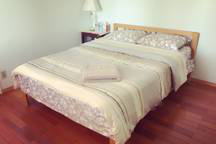

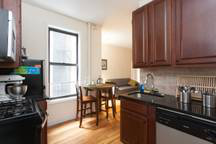

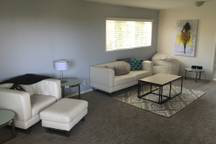

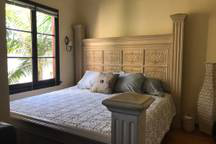

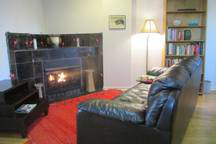

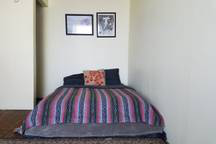

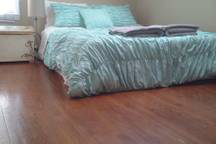

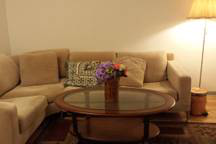

In [584]:
rows20 = mydata[0:20]
rows20
from urllib.request import urlopen
from PIL import Image
from IPython.display import display
#Image.open(urlopen(rows20.thumbnail_url.values[0:20]))

new_list = [i for i in rows20.thumbnail_url.values.tolist()]
for i in new_list:
    if i == 0:
        new_list.remove(i)
for x in range(len(new_list)):
    img = Image.open(urlopen(new_list[x]))
    display(img)

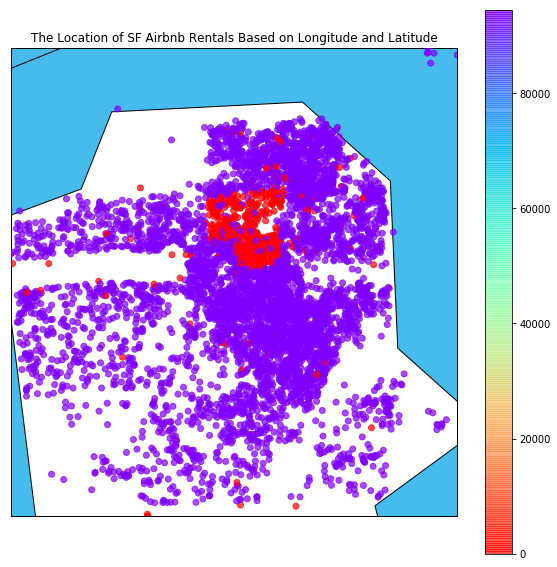

In [269]:
sf_data = mydata[mydata.city == 'SF']
import matplotlib.cm
from mpl_toolkits.basemap import Basemap
sf_lon = sf_data.longitude.values
sf_lat = sf_data.latitude.values
#Create the basemap of Airbnb rentals in SF using their longitude and latitude
sf_m = Basemap(llcrnrlon=min(sf_lon), llcrnrlat=min(sf_lat), urcrnrlon=max(sf_lon), urcrnrlat=max(sf_lat), lat_0=(max(sf_lat) - min(sf_lat)),
            lon_0=(max(sf_lon)-min(sf_lon)), projection='merc', resolution = 'i')
plt.figure(figsize=(10,10))
sf_m.drawcoastlines()
sf_m.drawcountries()
sf_m.drawstates()
sf_m.drawmapboundary(fill_color='#46bcec')
sf_m.fillcontinents(color = 'white',lake_color='#46bcec')
# Convert latitude and longitude to map projection coordinates
sf_lons, sf_lats = sf_m(sf_lon, sf_lat)
# Plot the scatter points onto the basemap with the color based on the zipcode using rainbow colormap
sf_m.scatter(sf_lons, sf_lats, c = sf_data.zipcode, marker = 'o', cmap ='rainbow_r', zorder = 10, alpha = 0.7)
plt.title('The Location of SF Airbnb Rentals Based on Longitude and Latitude')
plt.colorbar()
plt.show()

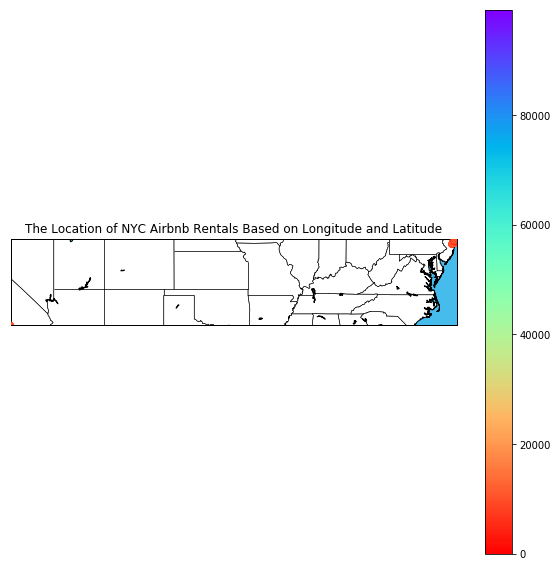

In [253]:
nyc_data = mydata[mydata.city == 'NYC']
nyc_lon = nyc_data.longitude.values
nyc_lat = nyc_data.latitude.values
#Create the basemap of Airbnb rentals in NYC using their longitude and latitude
nyc_m = Basemap(llcrnrlon=min(nyc_lon), llcrnrlat=min(nyc_lat), urcrnrlon=max(nyc_lon), urcrnrlat=max(nyc_lat), lat_0=(max(nyc_lat) - min(nyc_lat)),
            lon_0=(max(nyc_lon)-min(nyc_lon)), projection='merc', resolution = 'i')
plt.figure(figsize=(10,10))
nyc_m.drawcoastlines()
nyc_m.drawcountries()
nyc_m.drawstates()
nyc_m.drawmapboundary(fill_color='#46bcec')
nyc_m.fillcontinents(color = 'white',lake_color='#46bcec')
# Convert latitude and longitude to map projection coordinates
nyc_lons, nyc_lats = nyc_m(nyc_lon, nyc_lat)
# Plot the scatter points onto the basemap with the color based on the zipcode using rainbow colormap
nyc_m.scatter(nyc_lons, nyc_lats, c = nyc_data.zipcode, marker = 'o', cmap ='rainbow_r', zorder = 10)
plt.title('The Location of NYC Airbnb Rentals Based on Longitude and Latitude')
plt.colorbar()
plt.show()

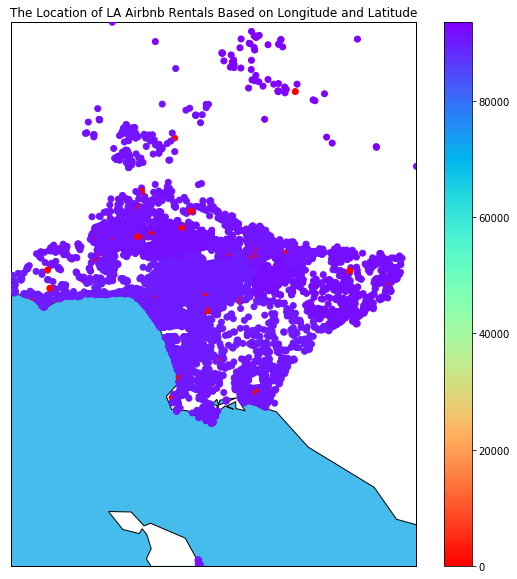

In [254]:
la_data = mydata[mydata.city == 'LA']
la_lon = la_data.longitude.values
la_lat = la_data.latitude.values
#Create the basemap of Airbnb rentals in LA using their longitude and latitude
la_m = Basemap(llcrnrlon=min(la_lon), llcrnrlat=min(la_lat), urcrnrlon=max(la_lon), urcrnrlat=max(la_lat), lat_0=(max(la_lat) - min(la_lat)),
            lon_0=(max(la_lon)-min(la_lon)), projection='merc', resolution = 'i')
plt.figure(figsize=(10,10))
la_m.drawcoastlines()
la_m.drawcountries()
la_m.drawstates()
la_m.drawmapboundary(fill_color='#46bcec')
la_m.fillcontinents(color = 'white',lake_color='#46bcec')
# Convert latitude and longitude to map projection coordinates
la_lons, la_lats = la_m(la_lon, la_lat)
# Plot the scatter points onto the basemap with the color based on the zipcode using rainbow colormap
la_m.scatter(la_lons, la_lats, c = la_data.zipcode, marker = 'o', cmap ='rainbow_r', zorder = 10)
plt.title('The Location of LA Airbnb Rentals Based on Longitude and Latitude')
plt.colorbar()
plt.show()

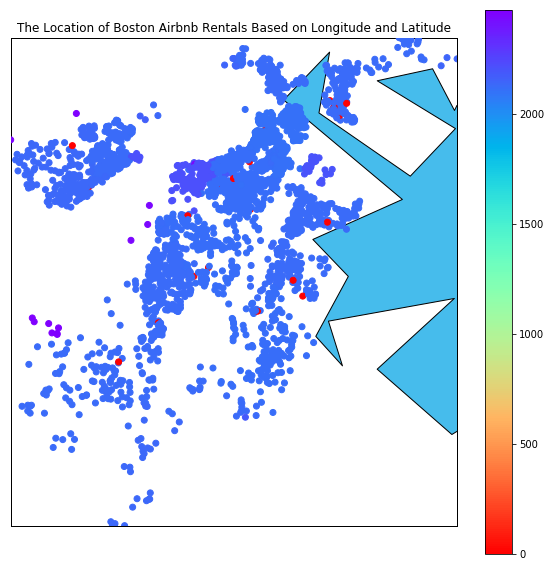

In [255]:
boston_data = mydata[mydata.city == 'Boston']
boston_lon = boston_data.longitude.values
boston_lat = boston_data.latitude.values
#Create the basemap of Airbnb rentals in Boston using their longitude and latitude
boston_m = Basemap(llcrnrlon=min(boston_lon), llcrnrlat=min(boston_lat), urcrnrlon=max(boston_lon), urcrnrlat=max(boston_lat), lat_0=(max(boston_lat) - min(boston_lat)),
            lon_0=(max(boston_lon)-min(boston_lon)), projection='merc', resolution = 'i')
plt.figure(figsize=(10,10))
boston_m.drawcoastlines()
boston_m.drawcountries()
boston_m.drawstates()
boston_m.drawmapboundary(fill_color='#46bcec')
boston_m.fillcontinents(color = 'white',lake_color='#46bcec')
# convert latitude and longitude to map projection coordinates
boston_lons, boston_lats = boston_m(boston_lon, boston_lat)
# Plot the scatter points onto the basemap with the color based on the zipcode using rainbow colormap
boston_m.scatter(boston_lons, boston_lats, c = boston_data.zipcode, marker = 'o', cmap ='rainbow_r', zorder = 10)
plt.title('The Location of Boston Airbnb Rentals Based on Longitude and Latitude')
plt.colorbar()
plt.show()

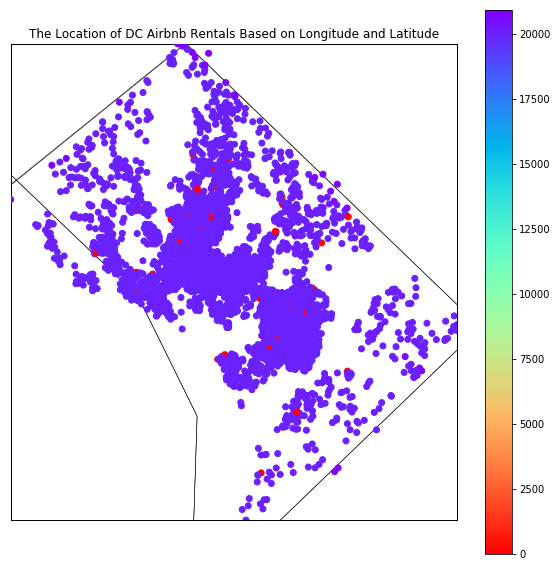

In [262]:
dc_data = mydata[mydata.city == 'DC']
dc_lon = dc_data.longitude.values
dc_lat = dc_data.latitude.values
#Create the basemap of Airbnb rentals in DC using their longitude and latitude
dc_m = Basemap(llcrnrlon=min(dc_lon), llcrnrlat=min(dc_lat), urcrnrlon=max(dc_lon), urcrnrlat=max(dc_lat), lat_0=(max(dc_lat) - min(dc_lat)),
            lon_0=(max(dc_lon)-min(dc_lon)), projection='merc', resolution = 'i')
plt.figure(figsize=(10,10))
dc_m.drawcoastlines()
dc_m.drawcountries()
dc_m.drawstates()
dc_m.drawmapboundary(fill_color='#46bcec')
dc_m.fillcontinents(color = 'white',lake_color='#46bcec')
# Convert latitude and longitude to map projection coordinates
dc_lons, dc_lats = dc_m(dc_lon, dc_lat)
# Plot the scatter points onto the basemap with the color based on the zipcode using rainbow colormap
dc_m.scatter(dc_lons, dc_lats, c = dc_data.zipcode, marker = 'o', cmap ='rainbow_r', zorder = 10)
plt.title('The Location of DC Airbnb Rentals Based on Longitude and Latitude')
plt.colorbar()
plt.show()

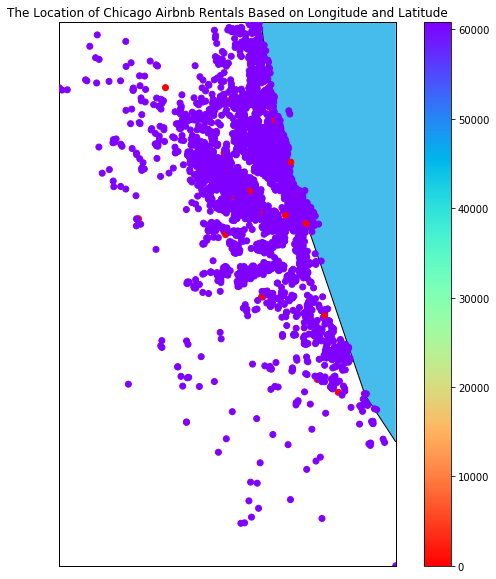

In [266]:
chicago_data = mydata[mydata.city == 'Chicago']
chicago_lon = chicago_data.longitude.values
chicago_lat = chicago_data.latitude.values
#Create the basemap of Airbnb rentals in DC using their longitude and latitude
chicago_m = Basemap(llcrnrlon=min(chicago_lon), llcrnrlat=min(chicago_lat), urcrnrlon=max(chicago_lon), urcrnrlat=max(chicago_lat), lat_0=(max(chicago_lat) - min(chicago_lat)),
            lon_0=(max(chicago_lon)-min(chicago_lon)), projection='merc', resolution = 'i')
plt.figure(figsize=(10,10))
chicago_m.drawcoastlines()
chicago_m.drawcountries()
chicago_m.drawstates()
chicago_m.drawmapboundary(fill_color='#46bcec')
chicago_m.fillcontinents(color = 'white',lake_color='#46bcec')
# Convert latitude and longitude to map projection coordinates
chicago_lons, chicago_lats = chicago_m(chicago_lon, chicago_lat)
# Plot the scatter points onto the basemap with the color based on the zipcode using rainbow colormap
chicago_m.scatter(chicago_lons, chicago_lats, c = chicago_data.zipcode, marker = 'o', cmap ='rainbow_r', zorder = 10)
plt.title('The Location of Chicago Airbnb Rentals Based on Longitude and Latitude')
plt.colorbar()
plt.show()

From the base maps, we can see that most of the listings are concentrated next to the ocean, which can attract more people to make reservations with the beautiful views. In DC and Boston, we can see listings are more concentrated in the center of the city, which we assume the concentrated areas are so close to the tourist sightseeing places or downtown of the cities. 

In [267]:
#Check the summary statistics on the columns that are numeric
mydata.describe()

,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds,year,text
count,7.392300e+04,73923.000000,73923.000000,73923.000000,73923.000000,73923.000000,73923.000000,73923.000000,73923.000000,73923.000000,73923.000000,73923.0
mean,1.126700e+07,4.782190,3.156487,1.232343,38.441071,-92.437653,20.905266,72.848951,1.264667,1.708494,2014.051107,1.0
std,6.081705e+06,0.717617,2.154869,0.585256,3.081674,21.711718,37.838483,39.917397,0.853257,1.255864,1.838333,0.0
min,3.440000e+02,0.000000,1.000000,0.000000,33.338905,-122.511500,0.000000,0.000000,0.000000,0.000000,2008.000000,1.0
25%,6.262122e+06,4.317488,2.000000,1.000000,34.126806,-118.342758,1.000000,80.000000,1.000000,1.000000,2013.000000,1.0
50%,1.225468e+07,4.709530,2.000000,1.000000,40.661531,-76.998346,6.000000,94.000000,1.000000,1.000000,2014.000000,1.0
75%,1.640204e+07,5.220356,4.000000,1.000000,40.746034,-73.954686,23.000000,99.000000,1.000000,2.000000,2015.000000,1.0
max,2.123090e+07,7.600402,16.000000,8.000000,42.390437,-70.985047,605.000000,100.000000,10.000000,18.000000,2017.000000,1.0


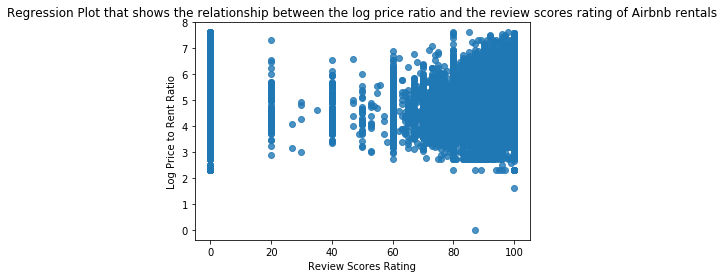

In [585]:
sns.regplot(x=mydata.review_scores_rating,y = mydata.log_price,fit_reg = False)
plt.title('Regression Plot that shows the relationship between the log price ratio and the review scores rating of Airbnb rentals')
plt.xlabel('Review Scores Rating')
plt.ylabel('Log Price to Rent Ratio')
plt.show()

<font size="20"> MACHINE LEARNING CLASSIFICATION ALGORITHM:  </font>

<font size="10"> **FITTING A LINEAR REGRESSION MODEL </font>

<font size="8"> 1. Using Numeric Independent Variables: </font>

id                        int64
log_price               float64
accommodates              int64
bathrooms               float64
latitude                float64
longitude               float64
number_of_reviews         int64
review_scores_rating    float64
bedrooms                float64
beds                      int64
year                      int64
text                      int64
dtype: object


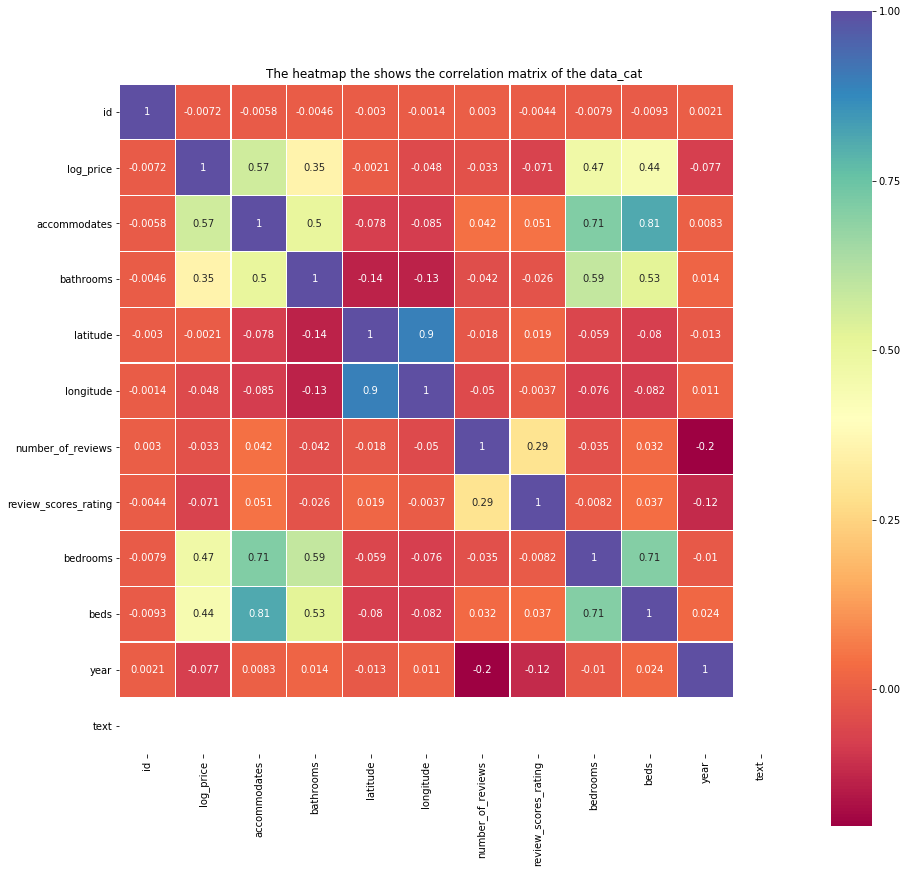

In [512]:
#Create new dataframe that has the columns of just numeric type.
data_num = mydata.select_dtypes(include=['number'])
print(data_num.dtypes)
#Plot the correlation matrix of the new data.
plt.figure(figsize=(15, 15))
sns.heatmap(data_num.corr(),linewidths=0.25,vmax=1.0,square=True,cmap="Spectral", linecolor='w',annot=True)
plt.title('The heatmap the shows the correlation matrix of the data_cat')
plt.show()

Based on the heatmap of the correlation matrix above, we can see that id, latitude, longitude, number_of_reviews, review_scores_rating, year and text doesn't have that much impact on the log_price variables since the its correlation matrix value are very low. <br />
So We decide to drop the unrelated/unneccessary variables out of the new dataframe.

<font size="5">OLS Regression Model on Multiple Independent Variables: </font>

In [513]:
#Drop the unrelated/unneccessary variables out of the new numeric dataframe.
data_num = data_num.drop(['id', 'latitude', 'longitude', 'number_of_reviews', 'review_scores_rating', 'year', 'text'], axis=1)


In [514]:
import statsmodels.api as sm
import statsmodels as statm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

def model_df(df):
    """ Fit the linear regression model onto the dataframe
        Parameters: 
            The dataframe that contains the independent variables
        Return: 
            The linear regression model that was fit into the dataframe
   """
    #Add the columns of ones to an array
    x = sm.add_constant(df)
    y_new = mydata[['log_price']]
    y = y_new
    # Fit the linear model
    model = linear_model.LinearRegression()
    results = model.fit(x, y)
    model = sm.OLS(y, x)
    ret = model.fit()
    return ret

#Fit the linear regression model on the data_num dataframe
#Get the summary of the new model 
model_df(data_num.drop(['log_price'],axis=1)).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     9495.
Date:                Sun, 09 Dec 2018   Prob (F-statistic):               0.00
Time:                        06:40:24   Log-Likelihood:                -65037.
No. Observations:               73923   AIC:                         1.301e+05
Df Residuals:                   73918   BIC:                         1.301e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            4.0902      0.005    801.507      0.000       4.080       4.100
accommodates     0.1789      0.002     99.568      0.000       0.175       0.182
bathrooms        0.0815      0.005     17.644      0.000       0.072       0.091
bedrooms         0.1228      0.004     30.758      0.000       0.115       0.131
beds            -0.0752      0.003    -24.249      0.000      -0.081      -0.069
==============================================================================
Omnibus:                     3115.442   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7036.212
Skew:                           0.268   Prob(JB):                         0.00
Kurtosis:                       4.413   Cond. No.                         13.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<font size="5">Using Cross Validation to Predict the Estimates of Y: </font>

In [515]:
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score, cross_val_predict
def cross_val_pre(df):
    """ The funtion helps predict the cross-validated estimates for each input data point
        Parameters:
                The dataset that contains the independent variables
        Return:
                The prediction estimate of y (dependent variable) for each input data point
   """
    data_num =df
    x = np.array(data_num.drop(['log_price'],axis=1), dtype=pd.Series)
    y = np.array(data_num['log_price'], dtype=pd.Series)
    model = linear_model.LinearRegression()
    y_pred = cross_val_predict(model, x, y, cv=5)
    return y_pred

#Predict the log_price variable using 4 independent variables and show the first 5
cross_val_pre(data_num)[0:5]

array([4.75474136, 5.55995482, 4.96091934, 4.97892045, 4.45522362])

Based on the Cross Validation, we get the estimates of Y prediction on log_price variable using 4 independent variable, and the log_price prediction for the first 5 Airbnb rentals are 4.75474136, 5.55995482, 4.96091934, 4.97892045, 4.45522362.

<font size="5">Using Cross Validation to Get the Mean RMS Error: </font>

In [516]:
def rms_error_mean(df):
    """ The funtion helps calculate the Cross Validation Error of the model fitted
        Parameters:
                The dataset that contains the independent variables
        Return:
                The mean squared error
   """
    data_num = df
    x = np.array(data_num.drop(['log_price'],axis=1), dtype=pd.Series)
    y = np.array(data_num['log_price'], dtype=pd.Series)
    model = linear_model.LinearRegression()
    ms_error= cross_val_score(model, x, y, cv=5, scoring = make_scorer(mean_squared_error))
    rms_err = np.sqrt(ms_error)
    return rms_err.mean()
#Get the Mean of RMS Error for the dataframe with numeric columns
rms_error_mean(data_num)

0.5833076807527344

Based on the RMSE prediction above, using 4 independent variables (accommodates,bathrooms, bedrooms, beds) gives us the RMS Error of 0.5833076807527344. <br /> 
Since the correlation between log price and bathrooms, bedrooms, beds are relatively smaller (0.35, 0.47, 0.44 correspondingly) than the correlation between log_price and accommodates (0.57) we decide to drop the three variables that have low correlation to log_price in the dataframe. <br /> Then fit into the OLS Regression Model using Single Independent Variable and get the summary of the new model.

<font size="5">OLS Regression Model on Single Independent Variable:</font>

In [517]:
#Drop the bathrooms, bedrooms, beds variables out of the new numeric dataframe.
data_num = data_num.drop(['bathrooms', 'bedrooms', 'beds'], axis=1)

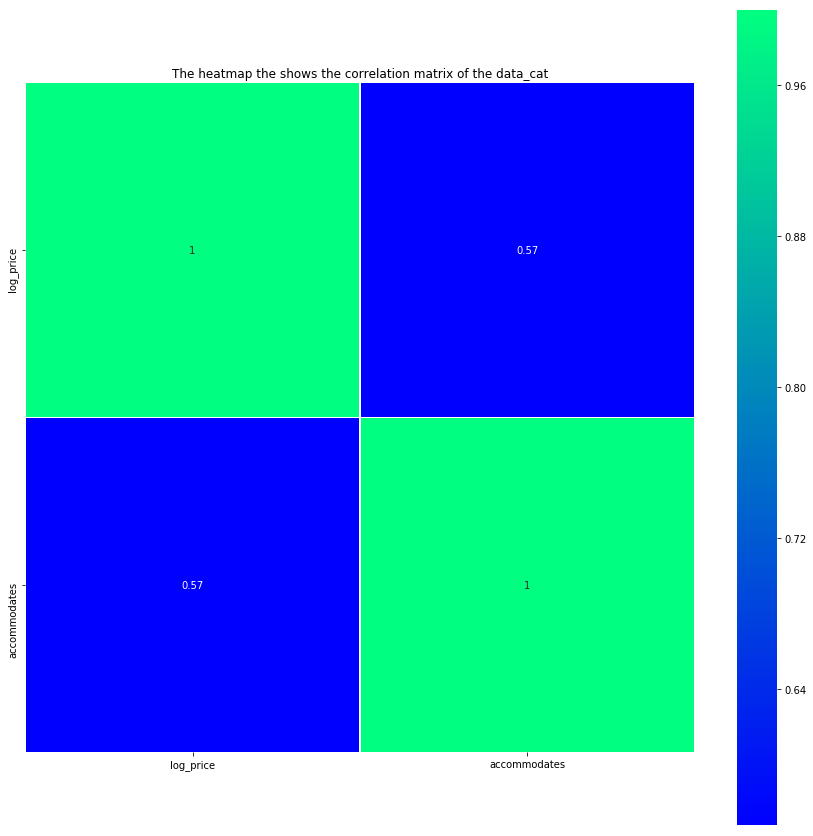

In [518]:
#Plot the correlation matrix of the new data.
plt.figure(figsize=(15, 15))
sns.heatmap(data_num.corr(),linewidths=0.25,vmax=1.0,square=True,cmap="winter", linecolor='w',annot=True)
plt.title('The heatmap the shows the correlation matrix of the data_cat')
plt.show()

In [519]:
#Fit the linear regression model on the new data_num dataframe 
#with only log_price as dependent variable and accommodates as independent variable.
#Get the summary of the new model 
model_df(data_num.drop(['log_price'],axis=1)).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.322
Model:                            OLS   Adj. R-squared:                  0.322
Method:                 Least Squares   F-statistic:                 3.516e+04
Date:                Sun, 09 Dec 2018   Prob (F-statistic):               0.00
Time:                        06:40:47   Log-Likelihood:                -65981.
No. Observations:               73923   AIC:                         1.320e+05
Df Residuals:                   73921   BIC:                         1.320e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            4.1854      0.004   1086.075      0.000       4.178       4.193
accommodates     0.1891      0.001    187.508      0.000       0.187       0.191
==============================================================================
Omnibus:                     3637.542   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9772.161
Skew:                           0.258   Prob(JB):                         0.00
Kurtosis:                       4.705   Cond. No.                         7.10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<font size="5">Using Cross Validation to Predict the Estimates of Y: </font>

In [520]:
#Predict the log_price variable using a single independent variable and show the first 5
cross_val_pre(data_num)[0:5]

array([4.75204655, 5.50768929, 5.12986792, 4.94095724, 4.56313587])

Based on the Cross Validation, we get the estimates of Y prediction on log_price variable using a single independent variable, and the log_price prediction for the first 5 Airbnb rentals are 4.75204655, 5.50768929, 5.12986792, 4.94095724, 4.56313587

<font size="5">Using Cross Validation to Get the Mean RMS Error: </font>

In [521]:
#Get the Mean of RMS Error for the dataframe with numeric columns
rmse_pred(data_num)

0.5907458857938345

Based on the RMSE prediction above, using only single independent variable (accommodates) gives us the RMS Error of 0.5907458857938345

In [522]:
#The first 5 log_price values of the original dataset
mydata.log_price[0:5]

0    5.010635
1    5.129899
2    4.976734
3    6.620073
4    4.744932
Name: log_price, dtype: float64

<font size="5">Which OLS Regression Model to Choose that Gives the Best Results/Prediction on Y (log_price)? </font>

Based on the two prediction for the estimates of Y using OLS Regression Model: <br />
    Using 4 independent varialbles gives us the Y estimates (first 5): 4.75474136, 5.55995482, 4.96091934, 4.97892045, 4.45522362 with the Mean RMS Error of 0.5833076807527344. <br />
    Using a single independent varialble gives us the Y estimates (first 5): 44.75204655, 5.50768929, 5.12986792, 4.94095724, 4.56313587 with the Mean RMS Error of 0.5907458857938345. <br />
    Comparing with the actual log_price rent ratio (first 5) above, Fitting the OLS Linear Regression with 4 Independent Variables gives us a better and more exact prediction of Y estimates with the lower Mean RMS Error. <br />

<font size="8"> 2. Using Categorical Independent Variables: </font>

In [523]:
#Create new dataframe that has the columns of just numeric type.
print(mydata.room_type.value_counts())
print(mydata.bed_type.value_counts())
print(mydata.cancellation_policy.value_counts())
print(mydata.city.value_counts())
print(mydata.host_identity_verified.value_counts())
print(mydata.instant_bookable.value_counts())

Entire home/apt    41223
Private room       30539
Shared room         2161
Name: room_type, dtype: int64
Real Bed         71847
Futon              750
Pull-out Sofa      582
Airbed             477
Couch              267
Name: bed_type, dtype: int64
strict             32296
flexible           22484
moderate           19014
super_strict_30      112
super_strict_60       17
Name: cancellation_policy, dtype: int64
NYC        32174
LA         22443
SF          6432
DC          5687
Chicago     3719
Boston      3468
Name: city, dtype: int64
t    49748
f    24175
Name: host_identity_verified, dtype: int64
f    54515
t    19408
Name: instant_bookable, dtype: int64


Since room_type with Entire Home/Apt, bed_type with Real Bed, cancellation_policy with strict, city with NYC, host_identity_verified with True and instant_bookable with False have higher percentage compared to other types, we create the dummy variables and add to new categorical dataframe since these variables listed above dont give new information, hence drop it for the fitting linear model process.

In [524]:
#Make dummy variables for the room_type column but drop the Entire Home/Apt
data_cat=pd.concat([data_num,mydata['room_type']], axis=1)
data_cat=pd.get_dummies(data_cat,columns= ['room_type'],drop_first=True)
#Make dummy variables for the bed_type column but drop the Real Bed
data_cat=pd.concat([data_cat,mydata['bed_type']], axis=1)
data_cat=pd.get_dummies(data_cat,columns=['bed_type'],drop_first=True)
#Make dummy variables for the cancellation_policy column but drop the strict (cancellation policy)
data_cat=pd.concat([data_cat,mydata['cancellation_policy']], axis=1)
data_cat=pd.get_dummies(data_cat,columns=['cancellation_policy'],drop_first=True)
#Make dummy variables for the city column but drop NYC
data_cat=pd.concat([data_cat,mydata['city']], axis=1)
data_cat=pd.get_dummies(data_cat,columns=['city'],drop_first=True)
#Make dummy variables for the host_identity_verified column but drop True
data_cat=pd.concat([data_cat,mydata['host_identity_verified']], axis=1)
data_cat=pd.get_dummies(data_cat,columns=['host_identity_verified'],drop_first=True)
#Make dummy variables for the instant_bookable column but drop False
data_cat=pd.concat([data_cat,mydata['instant_bookable']], axis=1)
data_cat=pd.get_dummies(data_cat,columns=['instant_bookable'],drop_first=True)
#Drop the accommodates column from the new categorical dataframe because it's numeric
data_cat = data_cat.drop(['accommodates'],axis=1)

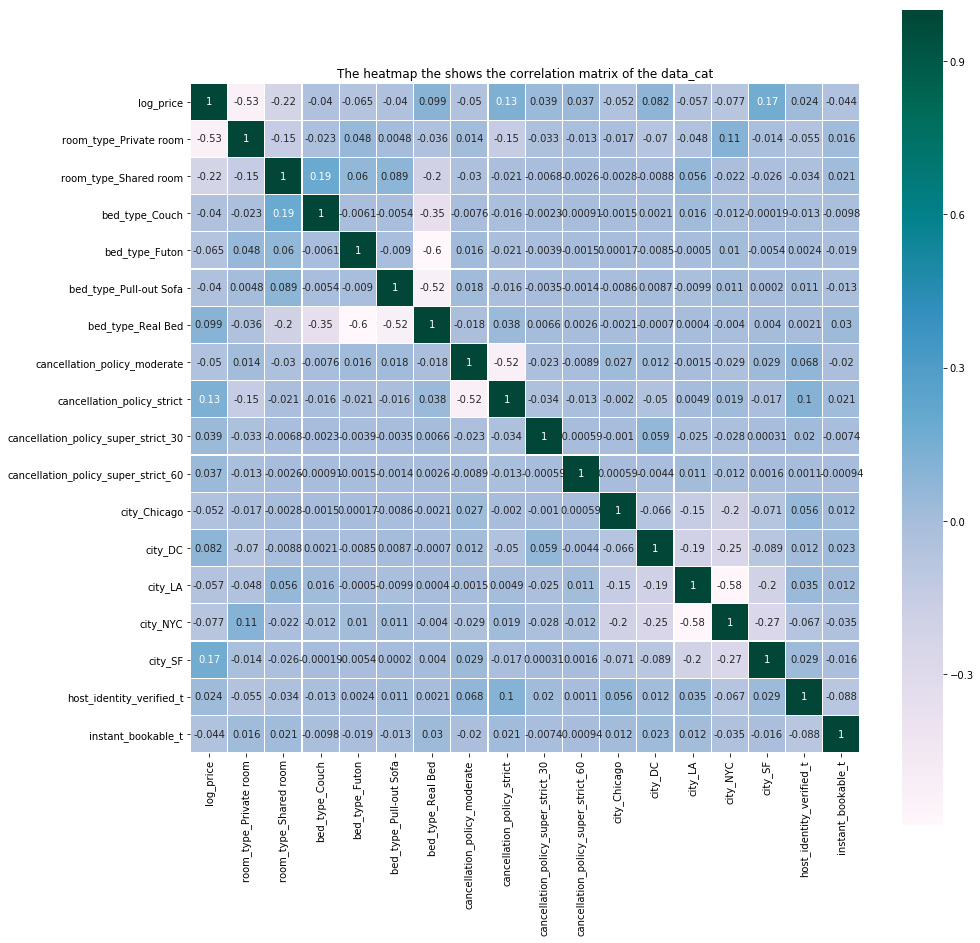

In [525]:
#Plot the correlation matrix of the new data.
plt.figure(figsize=(15, 15))
sns.heatmap(data_cat.corr(),linewidths=0.25,vmax=1.0,square=True,cmap="PuBuGn", linecolor='w',annot=True)
plt.title('The heatmap the shows the correlation matrix of the data_cat')
plt.show()

<font size="5">OLS Regression Model on Multiple Independent Variables: </font>

In [526]:
#Fit the linear regression model on the new data_cat dataframe 
#with only log_price as dependent variable and 18 independent variables.
#Get the summary of the new model 
model_df(data_cat.drop(['log_price'],axis=1)).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     3023.
Date:                Sun, 09 Dec 2018   Prob (F-statistic):               0.00
Time:                        06:41:08   Log-Likelihood:                -60851.
No. Observations:               73923   AIC:                         1.217e+05
Df Residuals:                   73905   BIC:                         1.219e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                   5.1578      0.027    188.654      0.000       5.104       5.211
room_type_Private room                 -0.8242      0.004   -192.893      0.000      -0.833      -0.816
room_type_Shared room                  -1.2678      0.013   -100.555      0.000      -1.292      -1.243
bed_type_Couch                          0.1363      0.042      3.215      0.001       0.053       0.219
bed_type_Futon                         -0.0513      0.032     -1.586      0.113      -0.115       0.012
bed_type_Pull-out Sofa                 -0.0104      0.034     -0.305      0.760      -0.077       0.056
bed_type_Real Bed                       0.0757      0.025      2.972      0.003       0.026       0.126
cancellation_policy_moderate           -0.0632      0.006    -11.458      0.000      -0.074      -0.052
cancellation_policy_strict              0.0393      0.005      7.954      0.000       0.030       0.049
cancellation_policy_super_strict_30     0.2610      0.052      4.978      0.000       0.158       0.364
cancellation_policy_super_strict_60     1.3930      0.134     10.413      0.000       1.131       1.655
city_Chicago                           -0.2254      0.013    -17.265      0.000      -0.251      -0.200
city_DC                                 0.0656      0.012      5.507      0.000       0.042       0.089
city_LA                                -0.1112      0.010    -11.013      0.000      -0.131      -0.091
city_NYC                               -0.0606      0.010     -6.131      0.000      -0.080      -0.041
city_SF                                 0.3168      0.012     27.200      0.000       0.294       0.340
host_identity_verified_t               -0.0317      0.004     -7.144      0.000      -0.040      -0.023
instant_bookable_t                     -0.0494      0.005    -10.655      0.000      -0.059      -0.040
==============================================================================
Omnibus:                    10454.202   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            22772.558
Skew:                           0.850   Prob(JB):                         0.00
Kurtosis:                       5.122   Cond. No.                         119.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<font size="5">Using Cross Validation to Predict the Estimates of Y: </font>

In [527]:
#Predict the log_price variable using 18 independent variables and show the first 5
cross_val_pre(data_cat)[0:5]

array([5.18154003, 5.16357256, 5.03094156, 5.5143574 , 5.1471185 ])

Based on the Cross Validation, we get the estimates of Y prediction on log_price variable using 18 independent variables, and the log_price prediction for the first 5 Airbnb rentals are 5.18154003, 5.16357256, 5.03094156, 5.5143574 , 5.1471185

<font size="5">Using Cross Validation to Get the Mean RMS Error: </font>

In [528]:
#Get the Mean of RMS Error for the dataframe with categorical columns
rms_error_mean(data_cat)

0.5512963783867209

Based on the RMSE prediction above, using 18 independent variables gives us the RMS Error of 0.5512963783867209

Based on the Correlation matrix above, we can see that the correlation between log_price and city_SF is the highest for categorical variable (0.17). <br /> So we decide to fit the OLS regression model using city_SF as a single independent variable and log_price as dependent variable.

<font size="5">OLS Regression Model on Single Independent Variable: </font>

In [529]:
#Subset the only neccessary variables (dependent: log_price, independent: city_SF) into the new categorical dataframe.
data_cat2 = data_cat[['log_price','city_SF']]
#Fit the linear regression model on the new data_cat dataframe 
#with only log_price as dependent variable and city_SF as independent variable.
#Get the summary of the new model 
model_df(data_cat2.drop(['log_price'],axis=1)).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     2117.
Date:                Sun, 09 Dec 2018   Prob (F-statistic):               0.00
Time:                        06:41:18   Log-Likelihood:                -79319.
No. Observations:               73923   AIC:                         1.586e+05
Df Residuals:                   73921   BIC:                         1.587e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7452      0.003   1742.267      0.000       4.740       4.751
city_SF        0.4248      0.009     46.007      0.000       0.407       0.443
==============================================================================
Omnibus:                     4024.326   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5182.127
Skew:                           0.535   Prob(JB):                         0.00
Kurtosis:                       3.733   Cond. No.                         3.58
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

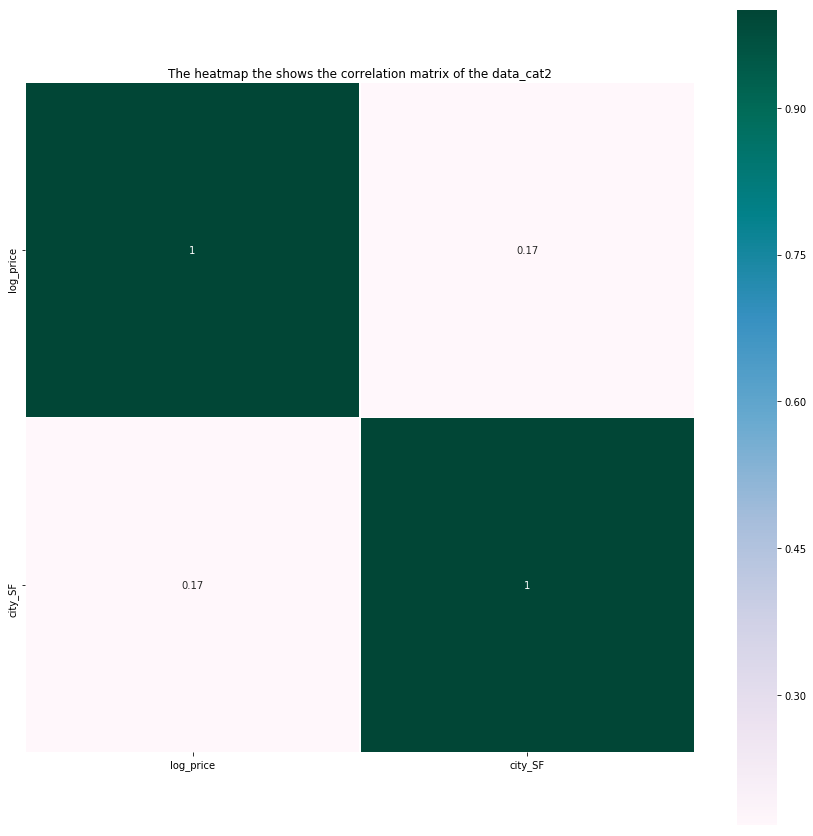

In [530]:
#Plot the correlation matrix of the new data.
plt.figure(figsize=(15, 15))
sns.heatmap(data_cat2.corr(),linewidths=0.25,vmax=1.0,square=True,cmap="PuBuGn", linecolor='w',annot=True)
plt.title('The heatmap the shows the correlation matrix of the data_cat2')
plt.show()

<font size="5">Using Cross Validation to Predict the Estimates of Y: </font>

In [531]:
#Predict the log_price variable using a single independent variable and show the first 5
cross_val_pre(data_cat2)[0:5]

array([4.74548765, 4.74548765, 4.74548765, 5.16881472, 4.74548765])

Based on the Cross Validation, we get the estimates of Y prediction on log_price variable using a single independent variable (city_SF), and the log_price prediction for the first 5 Airbnb rentals are 4.74548765, 4.74548765, 4.74548765, 5.16881472, 4.74548765

<font size="5">Using Cross Validation to Get the Mean RMS Error: </font>

In [532]:
#Get the Mean of RMS Error for the dataframe with categorical columns
rmse_pred(data_cat2)

0.7075375283967854

Based on the RMSE prediction above, using only single independent variable (city_SF) gives us the RMS Error of 0.7075375283967854

In [533]:
mydata.log_price[0:5]

0    5.010635
1    5.129899
2    4.976734
3    6.620073
4    4.744932
Name: log_price, dtype: float64

<font size="5">Which OLS Regression Model to Choose that Gives the Best Results/Prediction on Y (log_price)? </font>

Based on the two prediction for the estimates of Y using OLS Regression Model: <br />
Using 18 independent varialbles gives us the Y estimates (first 5): 5.18154003, 5.16357256, 5.03094156, 5.5143574 , 5.1471185 with the Mean RMS Error of 0.5512963783867209. <br />
Using a single independent varialble gives us the Y estimates (first 5):4.74548765, 4.74548765, 4.74548765, 5.16881472, 4.74548765 with the Mean RMS Error of 0.7075375283967854. <br />
Comparing with the actual log_price rent ratio (first 5) above, Fitting the OLS Linear Regression with 18 Independent Variables gives us a better and more exact prediction of Y estimates with the lower Mean RMS Error. <br />

<font size="12"> REPRESENTING AN INTERACTION USING INTERACTIVE DATAFRAME BETWEEN RELATED VARIABLES: </font>

<font size="4"> Interactive Dataframe that represents the relationship between The Number of Reviews and The Review Score Rating: </font>

In [534]:
#Create a new Interaction Dataframe that Adds the Review Score Rating and Numbers Columns that Shows Their Interaction
inter_df= pd.DataFrame()
inter_df['number_of_reviews']=mydata['number_of_reviews']
inter_df['review_scores_rating']=mydata['review_scores_rating']
inter_df['review_num_with_ratings']=mydata['number_of_reviews']*mydata['review_scores_rating']
#Fit the linear regression model on the new inter_df dataframe 
#with number_of_reviews, review_scores_rating and review_num_with_ratings as independent variables.
#Get the summary of the new model 
model_df(inter_df).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     206.9
Date:                Sun, 09 Dec 2018   Prob (F-statistic):          1.27e-133
Time:                        06:41:33   Log-Likelihood:                -80054.
No. Observations:               73923   AIC:                         1.601e+05
Df Residuals:                   73919   BIC:                         1.602e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       4.8815      0.005    889.638      0.000       4.871       4.892
number_of_reviews          -0.0210      0.001    -15.572      0.000      -0.024      -0.018
review_scores_rating       -0.0013   6.91e-05    -18.602      0.000      -0.001      -0.001
review_num_with_ratings     0.0002   1.43e-05     15.414      0.000       0.000       0.000
==============================================================================
Omnibus:                     3055.065   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3682.832
Skew:                           0.468   Prob(JB):                         0.00
Kurtosis:                       3.566   Cond. No.                     8.52e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.52e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [536]:
#Merging the two dataframe: data_cat and inter_df
data_cat3= pd.concat([data_cat,inter_df],axis=1)
#Fit the linear regression model on the new data_cat3 dataframe 
#Get the summary of the new model
model_df(data_cat3.drop(['log_price'], axis = 1)).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.427
Model:                            OLS   Adj. R-squared:                  0.427
Method:                 Least Squares   F-statistic:                     2756.
Date:                Sun, 09 Dec 2018   Prob (F-statistic):               0.00
Time:                        06:41:49   Log-Likelihood:                -59769.
No. Observations:               73923   AIC:                         1.196e+05
Df Residuals:                   73902   BIC:                         1.198e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                   5.2666      0.027    194.498      0.000       5.214       5.320
room_type_Private room                 -0.8259      0.004   -196.017      0.000      -0.834      -0.818
room_type_Shared room                  -1.2828      0.012   -103.167      0.000      -1.307      -1.258
bed_type_Couch                          0.1222      0.042      2.926      0.003       0.040       0.204
bed_type_Futon                         -0.0333      0.032     -1.045      0.296      -0.096       0.029
bed_type_Pull-out Sofa                  0.0121      0.034      0.360      0.719      -0.054       0.078
bed_type_Real Bed                       0.0774      0.025      3.085      0.002       0.028       0.127
cancellation_policy_moderate           -0.0022      0.006     -0.383      0.702      -0.013       0.009
cancellation_policy_strict              0.1031      0.005     20.305      0.000       0.093       0.113
cancellation_policy_super_strict_30     0.2851      0.052      5.517      0.000       0.184       0.386
cancellation_policy_super_strict_60     1.3788      0.132     10.459      0.000       1.120       1.637
city_Chicago                           -0.2223      0.013    -17.276      0.000      -0.247      -0.197
city_DC                                 0.0457      0.012      3.887      0.000       0.023       0.069
city_LA                                -0.1240      0.010    -12.456      0.000      -0.143      -0.104
city_NYC                               -0.0668      0.010     -6.848      0.000      -0.086      -0.048
city_SF                                 0.3070      0.011     26.722      0.000       0.284       0.329
host_identity_verified_t                0.0051      0.004      1.145      0.252      -0.004       0.014
instant_bookable_t                     -0.0338      0.005     -7.342      0.000      -0.043      -0.025
number_of_reviews                      -0.0199      0.001    -19.187      0.000      -0.022      -0.018
review_scores_rating                   -0.0022   5.53e-05    -40.051      0.000      -0.002      -0.002
review_num_with_ratings                 0.0002    1.1e-05     18.688      0.000       0.000       0.000
==============================================================================
Omnibus:                     8808.951   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18339.689
Skew:                           0.748   Prob(JB):                         0.00
Kurtosis:                       4.929   Cond. No.                     2.69e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The co

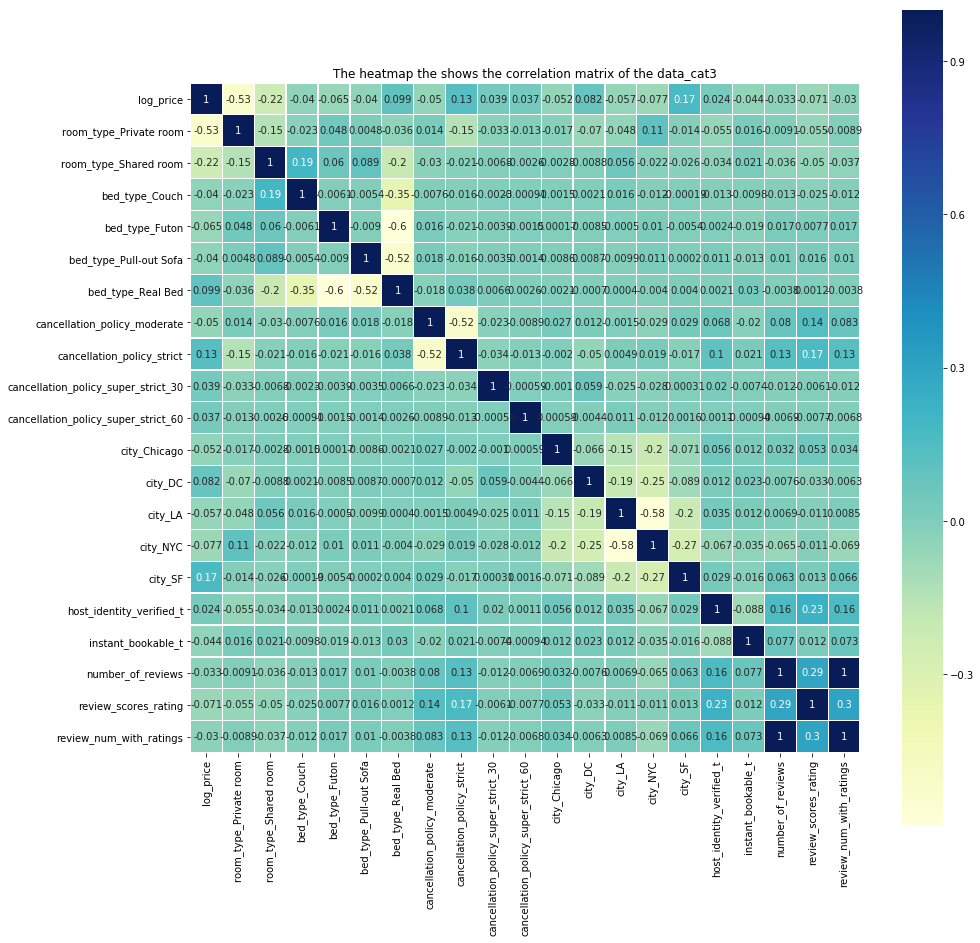

In [537]:
#Plot the correlation matrix of the new data.
plt.figure(figsize=(15, 15))
sns.heatmap(data_cat3.corr(),linewidths=0.25,vmax=1.0,square=True,cmap="YlGnBu", linecolor='w',annot=True)
plt.title('The heatmap the shows the correlation matrix of the data_cat3')
plt.show()

<font size="5">Using Cross Validation to Predict the Estimates of Y: </font>

In [538]:
#Predict the log_price variable using a single independent variable and show the first 5
cross_val_pre(data_cat3)[0:5]

array([5.1654721 , 5.13577557, 5.0350876 , 5.65501961, 5.22050827])

Based on the Cross Validation, we get the estimates of Y prediction on log_price variable using 20 independent variables that includes the one that shows the relationship between number_of_reviews and review_scores_rating, and the log_price prediction for the first 5 Airbnb rentals are 5.1654721 , 5.13577557, 5.0350876 , 5.65501961, 5.22050827

<font size="5">Using Cross Validation to Get the Mean RMS Error: </font>

In [539]:
#Get the Mean of RMS Error for the first interactive dataframe
rmse_pred(data_cat3)

0.5433327731350455

Based on the RMSE prediction above, using only 20 independent variables that includes the one that shows the relationship between number_of_reviews and review_scores_rating gives us the RMS Error of 0.5433327731350455

<font size="4"> Interactive Dataframe that Represents The Relationship Between The Number of Reviews and The Review Score Rating, As Well as the Relationship Between Bathrooms, Bedrooms, and Beds: </font>

In [540]:
#Create a new Interaction Dataframe that Adds the Bathrooms, Bedrooms, and Beds that Shows Their Interaction
inter_df2= pd.DataFrame()
inter_df2['bathrooms']=mydata['bathrooms']
inter_df2['bedrooms']=mydata['bedrooms']
inter_df2['beds']=mydata['beds']
inter_df2['bthrm_bdrm_bd']=mydata['bathrooms']*mydata['bedrooms']*mydata['beds']
#Fit the linear regression model on the new inter_df2 dataframe 
#with bathrooms, bedrooms, beds, and bthrm_bdrm_bd as independent variables.
#Get the summary of the new model 
model_df(inter_df2).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.253
Method:                 Least Squares   F-statistic:                     6262.
Date:                Sun, 09 Dec 2018   Prob (F-statistic):               0.00
Time:                        06:42:07   Log-Likelihood:                -69577.
No. Observations:               73923   AIC:                         1.392e+05
Df Residuals:                   73918   BIC:                         1.392e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             4.1059      0.007    630.467      0.000       4.093       4.119
bathrooms         0.1286      0.005     24.791      0.000       0.118       0.139
bedrooms          0.2500      0.004     60.610      0.000       0.242       0.258
beds              0.1251      0.003     45.297      0.000       0.120       0.130
bthrm_bdrm_bd    -0.0022      0.000    -15.004      0.000      -0.002      -0.002
==============================================================================
Omnibus:                     2333.966   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5462.425
Skew:                           0.162   Prob(JB):                         0.00
Kurtosis:                       4.292   Cond. No.                         77.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [541]:
#Merging the two dataframe: data_cat3 and inter_df2
data_cat4= pd.concat([data_cat3,inter_df2],axis=1)
#Fit the linear regression model on the new data_cat4 dataframe 
#Get the summary of the new model
model_df(data_cat4.drop(['log_price'], axis = 1)).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                     3680.
Date:                Sun, 09 Dec 2018   Prob (F-statistic):               0.00
Time:                        06:42:17   Log-Likelihood:                -51299.
No. Observations:               73923   AIC:                         1.026e+05
Df Residuals:                   73898   BIC:                         1.029e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                   4.7639      0.025    193.610      0.000       4.716       4.812
room_type_Private room                 -0.7022      0.004   -175.044      0.000      -0.710      -0.694
room_type_Shared room                  -1.2038      0.011   -107.885      0.000      -1.226      -1.182
bed_type_Couch                          0.1473      0.037      3.955      0.000       0.074       0.220
bed_type_Futon                         -0.0363      0.028     -1.278      0.201      -0.092       0.019
bed_type_Pull-out Sofa                  0.0464      0.030      1.550      0.121      -0.012       0.105
bed_type_Real Bed                       0.0204      0.022      0.911      0.362      -0.023       0.064
cancellation_policy_moderate           -0.0126      0.005     -2.503      0.012      -0.022      -0.003
cancellation_policy_strict              0.0368      0.005      8.079      0.000       0.028       0.046
cancellation_policy_super_strict_30     0.2829      0.046      6.138      0.000       0.193       0.373
cancellation_policy_super_strict_60     0.7744      0.118      6.582      0.000       0.544       1.005
city_Chicago                           -0.2630      0.011    -22.911      0.000      -0.285      -0.240
city_DC                                 0.0354      0.010      3.376      0.001       0.015       0.056
city_LA                                -0.1486      0.009    -16.712      0.000      -0.166      -0.131
city_NYC                               -0.0227      0.009     -2.605      0.009      -0.040      -0.006
city_SF                                 0.2929      0.010     28.591      0.000       0.273       0.313
host_identity_verified_t                0.0018      0.004      0.462      0.644      -0.006       0.010
instant_bookable_t                     -0.0392      0.004     -9.518      0.000      -0.047      -0.031
number_of_reviews                      -0.0208      0.001    -22.509      0.000      -0.023      -0.019
review_scores_rating                   -0.0020   4.94e-05    -40.276      0.000      -0.002      -0.002
review_num_with_ratings                 0.0002   9.81e-06     22.352      0.000       0.000       0.000
bathrooms                               0.1685      0.004     41.054      0.000       0.160       0.177
bedrooms                                0.1984      0.003     60.960      0.000       0.192       0.205
beds                                    0.0312      0.002     13.638      0.000       0.027       0.036
bthrm_bdrm_bd                          -0.0007      0.000     -6.184      0.000      -0.001      -0.000
==============================================================================
Omnibus:                     7625.387   Durbin-Watson:                   2.010
Prob(Omnibus)

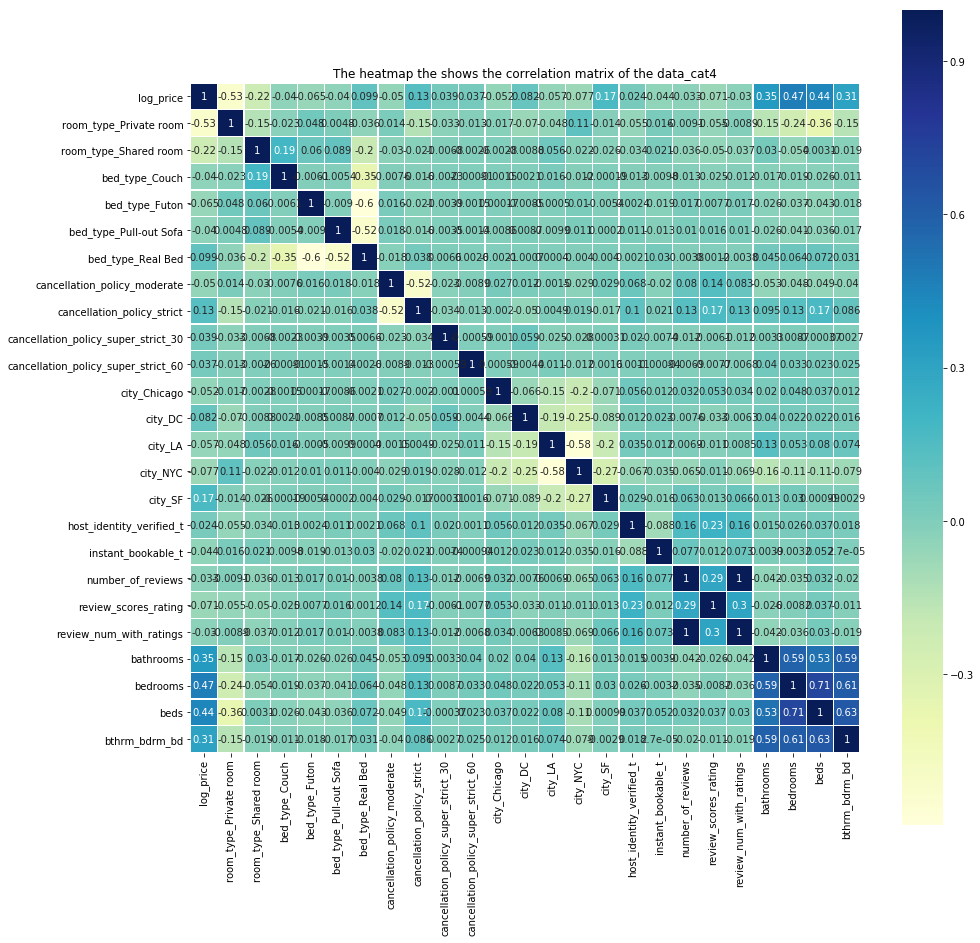

In [542]:
#Plot the correlation matrix of the new data.
plt.figure(figsize=(15, 15))
sns.heatmap(data_cat4.corr(),linewidths=0.25,vmax=1.0,square=True,cmap="YlGnBu", linecolor='w',annot=True)
plt.title('The heatmap the shows the correlation matrix of the data_cat4')
plt.show()

<font size="5">Using Cross Validation to Predict the Estimates of Y: </font>

In [543]:
#Predict the log_price variable using 24 independent variables and show the first 5
cross_val_pre(data_cat4)[0:5]

array([4.99987162, 5.42073906, 4.98276235, 5.69938209, 4.83734156])

Based on the Cross Validation, we get the estimates of Y prediction on log_price variable using 24 independent variables that includes the one that shows the relationship between number_of_reviews and review_scores_rating, as Well as the Relationship Between Bathrooms, Bedrooms, and Beds, and the log_price prediction for the first 5 Airbnb rentals are 4.99987162, 5.42073906, 4.98276235, 5.69938209, 4.83734156

<font size="5">Using Cross Validation to Get the Mean RMS Error: </font>

In [544]:
#Get the Mean of RMS Error for the first interactive dataframe
rmse_pred(data_cat4)

0.4845555842193157

Based on the RMSE prediction above, using only 24 independent variables that includes the one that shows the relationship between number_of_reviews and review_scores_rating, as Well as the Relationship Between Bathrooms, Bedrooms, and Beds, gives us the RMS Error of 0.4845555842193157

<font size="5">Which OLS Regression Model to Choose that Gives the Best Results/Prediction on Y (log_price) Using Interactive Dataframe? </font>

Based on the two prediction for the estimates of Y using OLS Regression Model: <br />
Using 20 independent varialbles gives us the Y estimates (first 5): 5.1654721 , 5.13577557, 5.0350876 , 5.65501961, 5.22050827 with the Mean RMS Error of 0.5433327731350455. <br />
Using 24 independent varialbles gives us the Y estimates (first 5): 4.99987162, 5.42073906, 4.98276235, 5.69938209, 4.83734156with the Mean RMS Error of 0.4845555842193157. <br />
Comparing with the actual log_price rent ratio (first 5) , Fitting the OLS Linear Regression with 24 Independent Variables Using interactive dataframe gives us a better and more exact prediction of Y estimates with the lower Mean RMS Error. <br />
The model with 24 independent variables using the interactive dataframe is the best model, not to mention it has the highest R2 value out of all models fitted.

<font size="10"> **FITTING LOGISTIC REGRESSION MODEL: </font>

In [548]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
#Assign the data_cat dataframe into new dataframe used for classification
class_df = data_cat
#Based on the mean of the log price of the data_cat df, assign the value 0 or 1 to the class_df in log_price column
class_df.loc[class_df.log_price > np.mean(data_cat.log_price), 'log_price'] = 1
class_df.loc[class_df.log_price <= np.mean(data_cat.log_price), 'log_price'] = 0
#Create 2 dataframe, one for Y(dependent variable), one for X(independent variables)
class_df_targety= class_df['log_price']
class_df_x=class_df.drop(['log_price'],axis=1)

In [549]:
#Using the train_test_split function to split the testing and training data for X and Y dataframes
x_training, x_testing, y_training, y_testing = train_test_split(class_df_x, class_df_targety, test_size = 0.2,random_state=0)
#Fit the logistic regression on the training and testing dataset of X and Y
log_model= LogisticRegression()
log_fit = log_model.fit(x_training.astype(int),y_training.astype(int))

<font size="5"> Predicting the Probability of A dependent variable (Y): </font>

In [550]:
from sklearn.metrics import classification_report
#Using the predict() function to predict the y estimates based on the testing set of X
prediction_y = log_model.predict(x_testing.astype(int))
#Building a text report showing the main classification metrics
print(classification_report(y_testing.astype(int), prediction_y.astype(int)))
print('The Logistic Regression Classifier on the testing set has the accuracy of : {:.2f}'.format(log_model.score(x_testing.astype(int), y_testing.astype(int))))


             precision    recall  f1-score   support

          0       0.74      0.86      0.80      7137
          1       0.85      0.72      0.78      7648

avg / total       0.80      0.79      0.79     14785

The Logistic Regression Classifier on the testing set has the accuracy of : 0.79


<font size="5"> Evaluating the Accuracy of a Logistic Regression Classification Using Confusion Matrix:</font>

In [551]:
from sklearn.metrics import confusion_matrix
#Find the confusion matrix that evaluates the accuracy of the classification
confusion_matrix = confusion_matrix(y_testing.astype(int), prediction_y.astype(int))
confusion_matrix

array([[6138,  999],
       [2109, 5539]])

Based on the Confussion Matrix obtained above, we can conclude that:<br /> There are 6138 + 5539 = 11677 correct predictions and there are 999 + 2109 = 3108 incorrect predictions using Logistic Regression classification.

<font size="5"> Plot the ROC Curve of a Logistic Regression Classification Model:</font>

In [555]:
from sklearn.metrics import roc_curve, roc_auc_score
#Computing false, true positive rates and the thresholds using roc_curve() function
fpr, tpr, thresholds = roc_curve(y_testing.astype(int), log_model.predict_proba(x_testing.astype(int))[:,1])
#Computing the Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores.
area_under_roc_auc = roc_auc_score(y_testing.astype(int), log_model.predict(x_testing.astype(int)))
print('The Area under the ROC AUC from the prediction scores is : ', area_under_roc_auc)

The Area under the ROC AUC from the prediction scores is :  0.792133426240061


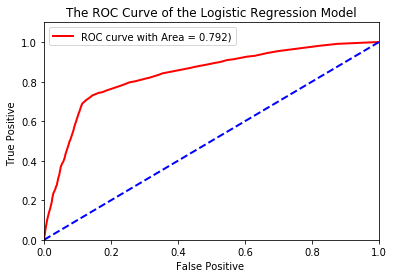

In [557]:
#Make the plot that shows the ROC curve of the logistic regression model
plt.figure()
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve with Area = %0.3f)' % area_under_roc_auc)
plt.plot([0, 1], [0, 1],color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive ')
plt.ylabel('True Positive ')
plt.title('The ROC Curve of the Logistic Regression Model')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.10])
plt.legend(loc = 'top')
plt.show()

Based on the ROC Curve of the Logistic Regression model above: <br /> The blue line shows the ROC curve of a random classifier while a red line shows the ROC curve with the area under the ROC curve of the logistic model (Area = 0.792). <br /> The further the ROC curve(red line) is from the blue line, the better the logistic regression model is.